## Data Format
- Loan_ID       =      Unique Loan ID
- Gender        =      Male/ Female
- Married       =      Applicant married (Y/N)
- Dependents    =      Number of dependents
- Education     =      Applicant Education (Graduate/ Under Graduate)
- Self_Employed =      Self-employed (Y/N)
- ApplicantIncome  =   Applicant income
- CoapplicantIncome =  Coapplicant income
- LoanAmount        =  Loan amount in thousands
- Loan_Amount_Term  =  Term of loan in months
- Credit_History    =  Credit history meets guidelines (0: Bad, 1: Good)
- Property_Area     =  Urban/ Semi Urban/ Rural
- Loan_Status       =  Loan approved (Y/N)


In [1]:
import warnings
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [2]:
sklearn.__version__

'0.24.1'

### Load the dataset

In [3]:
# Load the data 
train_data = pd.read_csv(r'C:\Users\asus\Desktop\DATA201\DATASETS\train.csv')
test_data = pd.read_csv(r'C:\Users\asus\Desktop\DATA201\DATASETS\test.csv')

In [4]:
# determine the target column
target_column = 'Loan_Status'

In [5]:
# remove irrelevant variables
train_data = train_data.drop("Loan_ID", axis=1)
test_data = test_data.drop("Loan_ID", axis=1)

In [6]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,1025,5500.0,216.0,360.0,NaN,Rural,Y
1,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y
2,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban,Y
3,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y
4,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban,N


In [7]:
# convert the target column from categorical to numerical 
train_data[target_column].replace({"N":0, "Y":1}, inplace=True)
test_data[target_column].replace({"N":0, "Y":1}, inplace=True)

In [8]:
# # convert yes/no to 1/0
# train_data['Loan_Status'] = train_data.Loan_Status.eq('Y').mul(1)
# test_data['Loan_Status'] = test_data.Loan_Status.eq('Y').mul(1)

In [9]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,473.000000,480.0000,452.000000,491.000000
mean,5354.780041,1562.686191,144.355180,342.5250,0.840708,0.686354
std,6339.972679,2792.527894,81.475461,64.5011,0.366354,0.464447
min,150.000000,0.000000,9.000000,12.0000,0.000000,0.000000
25%,2833.000000,0.000000,100.000000,360.0000,1.000000,0.000000
50%,3813.000000,1041.000000,126.000000,360.0000,1.000000,1.000000
75%,5699.000000,2227.500000,165.000000,360.0000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.0000,1.000000,1.000000


In [10]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,1025,5500.0,216.0,360.0,NaN,Rural,1
1,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,1
2,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban,1
3,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,1
4,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban,0


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             481 non-null    object 
 1   Married            488 non-null    object 
 2   Dependents         478 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      465 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         473 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     452 non-null    float64
 10  Property_Area      491 non-null    object 
 11  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 46.2+ KB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             120 non-null    object 
 1   Married            123 non-null    object 
 2   Dependents         121 non-null    object 
 3   Education          123 non-null    object 
 4   Self_Employed      117 non-null    object 
 5   ApplicantIncome    123 non-null    int64  
 6   CoapplicantIncome  123 non-null    float64
 7   LoanAmount         119 non-null    float64
 8   Loan_Amount_Term   120 non-null    float64
 9   Credit_History     112 non-null    float64
 10  Property_Area      123 non-null    object 
 11  Loan_Status        123 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 11.7+ KB


### Explore the training set to gain insights.

In [13]:
train_data["Dependents"].value_counts()

0     280
2      81
1      75
3+     42
Name: Dependents, dtype: int64

In [14]:
train_data["Education"].value_counts()

Graduate        384
Not Graduate    107
Name: Education, dtype: int64

In [15]:
train_data["Property_Area"].value_counts()

Semiurban    185
Urban        164
Rural        142
Name: Property_Area, dtype: int64

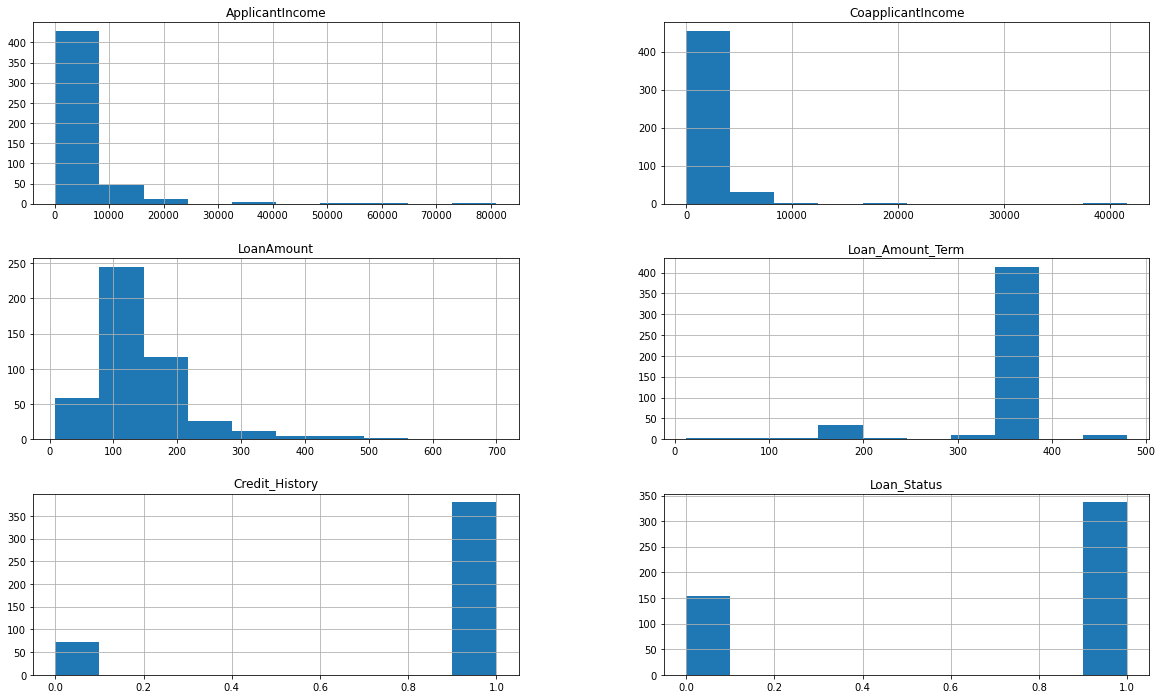

In [16]:
loan = train_data.copy()

loan.hist(figsize=(20,12));
fig = plt.gcf()
fig.savefig('hist.pdf', bbox_inches='tight');

* `LoanAmount`: there are not that many points for `LoanAmount > 400`;
* `ApplicantIncome` peaks around 0-10000, this was very likely the standard number of applicants income at the time of the data collection;

#### The correlations

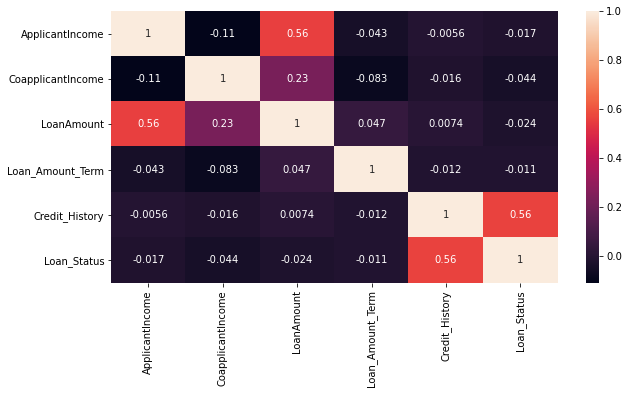

In [17]:
import seaborn as sns

plt.figure(figsize = (10,5))
sns.heatmap(loan.corr(), annot = True)
plt.show()

#### Comment:
* There is a positive correlation between `ApplicantIncome` and `LoanAmount`, which is 0.56, and `CoapplicantIncome` and `LoanAmount` which is 0.23.
* All the other correlations are weak as the coefficients close to 0.

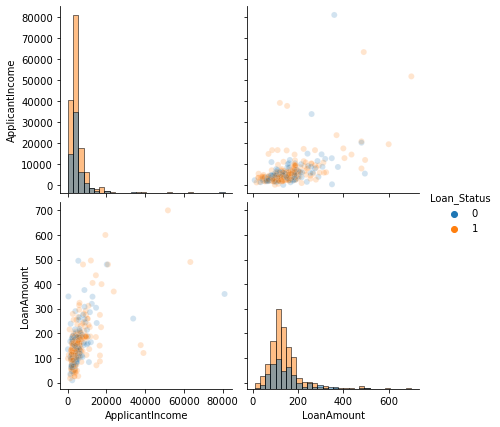

In [18]:
import seaborn as sns

n_samples_to_plot = 5000

columns = ['ApplicantIncome', 'LoanAmount']
sns.pairplot(data=loan[:n_samples_to_plot], vars=columns,
             hue="Loan_Status", plot_kws={'alpha': 0.2},
             height=3, diag_kind='hist', diag_kws={'bins': 30});

### Select one machine learning model, train, optimise.

In [19]:
# separate the predictors and the labels
X_train = train_data.drop("Loan_Status", axis=1)
y_train = train_data["Loan_Status"].copy()  # save the labels

In [20]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,1025,5500.0,216.0,360.0,NaN,Rural
1,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural
2,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban
3,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban
4,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban


In [21]:
y_train.head()

0    1
1    1
2    1
3    1
4    0
Name: Loan_Status, dtype: int64

In [22]:
X_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [23]:
X_train.shape

(491, 11)

In [24]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

# a function for getting all categorical_columns, apart from Dependents
def get_categorical_columns(df):
    categorical_columns_selector = selector(dtype_include=object)
    categorical_columns = categorical_columns_selector(df.drop("Dependents", axis=1))
    return categorical_columns

In [25]:
get_categorical_columns(X_train)

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [26]:
# a function for getting all numerical_columns
def get_numerical_columns(df):
    numerical_columns_selector = selector(dtype_exclude=object)
    numerical_columns = numerical_columns_selector(df)
    return numerical_columns

In [27]:
get_numerical_columns(X_train)

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [28]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# a function for Transformation the data
def my_transformation(df):
    df = df.copy()
    
    numerical_columns = get_numerical_columns(df)
    nominal_columns = get_categorical_columns(df)
    ordinal_columns = ['Dependents']
    order = [['0', '1', '2', '3+']]
    
    numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                               ('scaler', StandardScaler())])
    nominal_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                             ('encoder', OneHotEncoder(handle_unknown='ignore'))])
    ordinal_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                             ('encoder', OrdinalEncoder(categories=order,
                                                        handle_unknown='use_encoded_value', 
                                                        unknown_value=-1,)),
                             ('scaler', StandardScaler())])

    preprocessor = ColumnTransformer([
        ('numerical_transformer', numerical_pipeline, numerical_columns),
        ('nominal_transformer', nominal_pipeline, nominal_columns),
        ('ordinal_transformer', ordinal_pipeline, ordinal_columns),
    ])
    
    # adding new features
    preprocessor2 = Pipeline([('pre', preprocessor), 
                              ('poly', PolynomialFeatures(degree=2, include_bias=False))])
    
    
    preprocessor2.fit(df)

    return preprocessor2

##### Prepare the data

In [29]:
preprocessor = my_transformation(X_train)
X_train_prepared = preprocessor.transform(X_train)
X_train_prepared.shape

(491, 170)

In [30]:
from sklearn.model_selection import GridSearchCV

# a function for tuning the model with hyper-parameter using grid search
def tune_model(model, param_grid, X_train_prepared):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', return_train_score=True)
    grid_search.fit(X_train_prepared, y_train);
    print('grid_search.best_estimator_: ', grid_search.best_estimator_)
    final_model = grid_search.best_estimator_
    return final_model

In [31]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score

# a function for estimating the performance of the model with cross-validation
def estimat_model(model, X_train_prepared, y_train, score):
    cv = StratifiedKFold(n_splits=5)
    scores = cross_val_score(model, X_train_prepared, y_train, cv=cv, scoring = score)
    return scores.mean()

#### Train a LogisticRegression model

In [32]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42,max_iter=1000).fit(X_train_prepared, y_train);

In [33]:
%%time
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
]

final_model_lr = tune_model(lr_model, param_grid, X_train_prepared)

grid_search.best_estimator_:  LogisticRegression(C=0.001, max_iter=1000, random_state=42)
Wall time: 5.14 s


#### Train a SVM model

In [34]:
from sklearn.svm import SVC

svm = SVC(random_state=42,probability=True).fit(X_train_prepared, y_train)

In [35]:
%%time
param_grid = [
    {'C': [0.1, 1, 10, 100, 1000, 10000], 
     'gamma': [0.001, 0.01, 0.1, 1, 10, 'scale','auto']},
]

final_model_SVM = tune_model(svm, param_grid, X_train_prepared)

grid_search.best_estimator_:  SVC(C=0.1, gamma=0.1, probability=True, random_state=42)
Wall time: 30.9 s


#### Train a RandomForestClassifier model

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42).fit(X_train_prepared, y_train)

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(50, 200),
    'max_features': randint(3, 11),
    'max_depth': randint(5, 100),
    'max_leaf_nodes':randint(2, 20),
    'min_samples_leaf': randint(2, 4),
}

final_model_rf = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5,
                                   scoring='roc_auc', return_train_score=True, random_state=0)

final_model_rf.fit(X_train_prepared, y_train);
final_model_rf = final_model_rf.best_estimator_
final_model_rf

RandomForestClassifier(max_depth=92, max_features=9, max_leaf_nodes=19,
                       min_samples_leaf=3, n_estimators=75, random_state=42)

#### Train a DecisionTreeClassifier model

In [38]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1, random_state=42).fit(X_train_prepared, y_train)

In [39]:
%%time
param_grid = [
    {'max_depth': [1, 2, 3, 5, 10, 20],
    'min_samples_leaf': [2, 3, 4, 5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]},
]

final_tree = tune_model(tree, param_grid, X_train_prepared)

grid_search.best_estimator_:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
Wall time: 6.33 s


#### Train a KNeighborsClassifier model

In [40]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3).fit(X_train_prepared, y_train)

In [41]:
%%time
param_grid = [
    {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
]

final_clf = tune_model(clf, param_grid, X_train_prepared)

grid_search.best_estimator_:  KNeighborsClassifier(n_neighbors=7)
Wall time: 613 ms


#### Train a GradientBoostingClassifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42).fit(X_train_prepared, y_train)

In [43]:
%%time
param_grid = [
    {'n_estimators': [10, 50, 100, 150, 200],
     'max_depth': [1, 2, 3, 5],
    'learning_rate': [0.01, 0.1]},
]

final_gbrt = tune_model(gbrt, param_grid, X_train_prepared)

grid_search.best_estimator_:  GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)
Wall time: 1min 45s


#### Train a VotingClassifier

In [44]:
%%time
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lr', final_model_lr), ('rf', final_model_rf), ('svc', final_model_SVM)],voting='soft')
voting_clf = voting_clf.fit(X_train_prepared, y_train)

Wall time: 445 ms


##### The performance

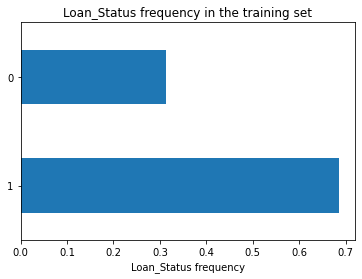

In [45]:
y_train.value_counts(normalize=True).plot.barh()
plt.xlabel("Loan_Status frequency")
plt.title("Loan_Status frequency in the training set");

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, average_precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# a function for getting the performance of the model on the validation set
def get_performance(model, X, y):
    res = []
    acc_mean = estimat_model(model, X, y, score = "accuracy")
    bc_mean = estimat_model(model, X, y, score = "balanced_accuracy")
    
    y_train_pred = cross_val_predict(model, X, y, cv=3)
    M = confusion_matrix(y, y_train_pred)
    tn, fp, fn, tp = M.ravel()
    spe = tn / (tn + fp) 
    precision = precision_score(y, y_train_pred)
    recall = recall_score(y, y_train_pred)
    f1 = f1_score(y, y_train_pred)
    
    ROC = estimat_model(model, X, y, score = "roc_auc")
    
    res.append([acc_mean, bc_mean, precision, recall, spe, f1, ROC])
    return res

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, average_precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# a function for getting all evaluation metrics
def get_metric(model, X, y):
    results = []
    predicted = model.predict(X)
    
    M = confusion_matrix(y, predicted)
    tn, fp, fn, tp = M.ravel()
    
    spe = tn / (tn + fp)             # specificity, selectivity or true negative rate (TNR)
    ACC = accuracy_score(y, predicted)
    BAC = balanced_accuracy_score(y, predicted)
    
    precision = precision_score(y, predicted)
    recall = recall_score(y, predicted)
    F1 = f1_score(y, predicted)
   
    y_score = model.predict_proba(X)[:, 1]
    ROC = roc_auc_score(y, y_score)
    PR = average_precision_score(y, y_score)
    
    results.append([ACC, BAC, precision, recall, spe, F1, ROC, PR])
    return results

In [48]:
# a function to display all scores

def show_results(x, y, func, models):

    if (models == classifiers):
        names = ['SVM', 'LogisticRegression','RandomForestClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'VotingClassifier','GradientBoostingClassifier']
    else:
        names = ['RandomForestClassifier']
    metrics1 = ['Accuracy', 'Balance-Acc','Precision', 'Recall(Sensitivity)','Specificity','F1-score', 'AUC-ROC']
    metrics2 = ['Accuracy', 'Balance-Acc','Precision', 'Recall(Sensitivity)','Specificity','F1-score', 'AUC-ROC', 'AUC-PR']
    data_res = [func(c, x, y)[0] for c in models]
    if(func == get_performance):
        metrics = metrics1
    else:
        metrics = metrics2
    results = pd.DataFrame(data=data_res, index=names, columns=metrics)
    results = results.sort_values(by=['AUC-ROC'], ascending=False)
    return results

### Estimate the performance before tunning

In [49]:
classifiers = [svm, lr_model, rf, tree, clf, voting_clf, gbrt]
print('Training set model performance before tuning: ')
a = show_results(X_train_prepared, y_train, get_metric, classifiers)
a

Training set model performance before tuning: 


,Accuracy,Balance-Acc,Precision,Recall(Sensitivity),Specificity,F1-score,AUC-ROC,AUC-PR
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
GradientBoostingClassifier,0.951120,0.922078,0.933518,1.000000,0.844156,0.965616,0.996840,0.998517
VotingClassifier,0.843177,0.757052,0.820197,0.988131,0.525974,0.896366,0.971964,0.986149
KNeighborsClassifier,0.843177,0.776446,0.838542,0.955490,0.597403,0.893204,0.918648,0.943341
SVM,0.814664,0.715124,0.795673,0.982196,0.448052,0.879150,0.878261,0.922227
LogisticRegression,0.839104,0.757611,0.822500,0.976261,0.538961,0.892809,0.870226,0.928465
DecisionTreeClassifier,0.808554,0.705384,0.789976,0.982196,0.428571,0.875661,0.705384,0.788131


In [50]:
classifiers = [svm, lr_model, rf, tree, clf, voting_clf, gbrt]
print('Validation set model performance before tuning: ')
b = show_results(X_train_prepared, y_train, get_performance, classifiers)
b

Validation set model performance before tuning: 


,Accuracy,Balance-Acc,Precision,Recall(Sensitivity),Specificity,F1-score,AUC-ROC
VotingClassifier,0.808617,0.705412,0.788462,0.973294,0.428571,0.871182,0.771959
RandomForestClassifier,0.771965,0.685914,0.792839,0.919881,0.474026,0.851648,0.771892
SVM,0.804556,0.698853,0.785203,0.976261,0.415584,0.870370,0.729493
DecisionTreeClassifier,0.808617,0.705304,0.789976,0.982196,0.428571,0.875661,0.705304
GradientBoostingClassifier,0.757782,0.673757,0.782383,0.896142,0.454545,0.835408,0.704025
KNeighborsClassifier,0.767821,0.687913,0.778061,0.905045,0.435065,0.836763,0.683070
LogisticRegression,0.749557,0.663995,0.780362,0.896142,0.448052,0.834254,0.667854


In [51]:
variance_error = a['AUC-ROC']-b['AUC-ROC']
variance_error.sort_values()

DecisionTreeClassifier        0.000079
SVM                           0.148768
VotingClassifier              0.200006
LogisticRegression            0.202373
RandomForestClassifier        0.228108
KNeighborsClassifier          0.235578
GradientBoostingClassifier    0.292815
Name: AUC-ROC, dtype: float64

### Comment:
#### why RandomForestClassifier?
- From the above model performance metrics, we can see that for `RandomForestClassifier` has one of the highest AUC-ROC score in the cross-validation, which is 0.77.
- Also in the training set, the AUC-ROC score is around 1 which means is doing pretty well. 
- Therefore, we should choose RandomForestClassifier.

### Estimate the performance after tunning.

In [52]:
classifiers = [final_model_SVM, final_model_lr, final_model_rf, final_tree, final_clf, voting_clf, final_gbrt]
print('Training set model performance after tuning: ')
c = show_results(X_train_prepared, y_train, get_metric, classifiers)
c

Training set model performance after tuning: 


,Accuracy,Balance-Acc,Precision,Recall(Sensitivity),Specificity,F1-score,AUC-ROC,AUC-PR
GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
VotingClassifier,0.843177,0.757052,0.820197,0.988131,0.525974,0.896366,0.971964,0.986149
SVM,0.686354,0.500000,0.686354,1.000000,0.000000,0.814010,0.970827,0.978539
RandomForestClassifier,0.832994,0.744345,0.813268,0.982196,0.506494,0.889785,0.963197,0.982356
DecisionTreeClassifier,0.835031,0.763459,0.829897,0.955490,0.571429,0.888276,0.852769,0.897099
KNeighborsClassifier,0.814664,0.720413,0.800000,0.973294,0.467532,0.878179,0.852306,0.903839
LogisticRegression,0.812627,0.711877,0.793765,0.982196,0.441558,0.877984,0.810783,0.882179


In [53]:
classifiers = [final_model_SVM, final_model_lr, final_model_rf, final_tree, final_clf, voting_clf, final_gbrt]
print('Validation set model performance after tuning: ')
d = show_results(X_train_prepared, y_train, get_performance, classifiers)
d

Validation set model performance after tuning: 


,Accuracy,Balance-Acc,Precision,Recall(Sensitivity),Specificity,F1-score,AUC-ROC
RandomForestClassifier,0.800474,0.703038,0.792271,0.973294,0.441558,0.873502,0.778027
VotingClassifier,0.808617,0.705412,0.788462,0.973294,0.428571,0.871182,0.771959
SVM,0.686353,0.500000,0.686354,1.000000,0.000000,0.814010,0.743836
LogisticRegression,0.808617,0.705412,0.780660,0.982196,0.396104,0.869908,0.740354
DecisionTreeClassifier,0.749619,0.680093,0.789894,0.881306,0.487013,0.833100,0.735752
KNeighborsClassifier,0.798433,0.696130,0.786765,0.952522,0.435065,0.861745,0.721153
GradientBoostingClassifier,0.739373,0.665653,0.782258,0.863501,0.474026,0.820874,0.719183


In [54]:
variance_error = c['AUC-ROC']-d['AUC-ROC']
variance_error.sort_values()

LogisticRegression            0.070428
DecisionTreeClassifier        0.117016
KNeighborsClassifier          0.131154
RandomForestClassifier        0.185170
VotingClassifier              0.200006
SVM                           0.226991
GradientBoostingClassifier    0.280817
Name: AUC-ROC, dtype: float64

### Comment:
#### why RandomForestClassifier?
- From the above model performance metrics, we can see that for `RandomForestClassifier` has the highest AUC-ROC score in the cross-validation after tunning, which is 0.78.
- Also in the training set, the AUC-ROC score of RandomForestClassifier is around 0.96 which is pretty good. Even though it does not have the lowest variance_error. 
- Overall, RandomForestClassifier is a better choice out of all the others.

### Test the final model on the test set.


In [55]:
# separate the test set and the labels
X_test = test_data.drop("Loan_Status", axis=1)
y_test = test_data["Loan_Status"].copy()  # save the labels

In [56]:
X_test_prepared = preprocessor.transform(X_test) 
X_test_prepared.shape

(123, 170)

##### The ROC Curve

In [57]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train_prepared, y_train);

In [58]:
from sklearn.metrics import plot_roc_curve

def plot_roc(model, x, y):
    f = plot_roc_curve(model, x, y, ax=plt.figure(figsize=(5,5)).gca())
    f = plot_roc_curve(dummy_classifier, x, y, color="tab:orange", linestyle="--", ax=f.ax_)
    f.ax_.set_title("ROC AUC curve");
    f.figure_.savefig('roc_curve.pdf', bbox_inches='tight')

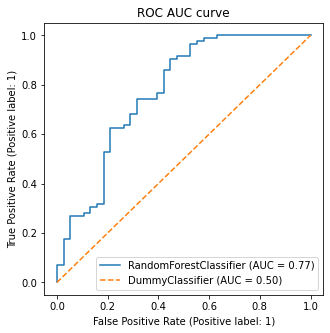

In [59]:
plot_roc(final_model_rf, X_test_prepared, y_test)

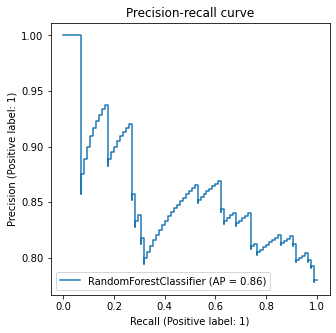

In [60]:
from sklearn.metrics import plot_precision_recall_curve

f = plot_precision_recall_curve(final_model_rf, X_test_prepared, y_test,
                                ax=plt.figure(figsize=(5,5)).gca())
f.ax_.set_title("Precision-recall curve");
f.figure_.savefig('pr_curve.pdf', bbox_inches='tight')

##### Evaluation metrics

In [61]:
X_test_prepared.shape

(123, 170)

In [62]:
print('Test set model performance: ')
classifier = [final_model_rf]
show_results(X_test_prepared, y_test, get_metric, classifier)

Test set model performance: 


,Accuracy,Balance-Acc,Precision,Recall(Sensitivity),Specificity,F1-score,AUC-ROC,AUC-PR
RandomForestClassifier,0.813008,0.704644,0.792453,0.988235,0.421053,0.879581,0.770898,0.857629


In [63]:
classifiers = [final_model_SVM, final_model_lr, final_model_rf, final_tree, final_clf, voting_clf, final_gbrt]
show_results(X_test_prepared, y_test, get_metric, classifiers)

,Accuracy,Balance-Acc,Precision,Recall(Sensitivity),Specificity,F1-score,AUC-ROC,AUC-PR
LogisticRegression,0.829268,0.723684,0.801887,1.000000,0.447368,0.890052,0.794737,0.859262
VotingClassifier,0.821138,0.717802,0.800000,0.988235,0.447368,0.884211,0.785449,0.869345
RandomForestClassifier,0.813008,0.704644,0.792453,0.988235,0.421053,0.879581,0.770898,0.857629
KNeighborsClassifier,0.829268,0.738235,0.813725,0.976471,0.500000,0.887701,0.756966,0.831550
SVM,0.691057,0.500000,0.691057,1.000000,0.000000,0.817308,0.754180,0.834910
GradientBoostingClassifier,0.772358,0.718885,0.820225,0.858824,0.578947,0.839080,0.732508,0.821794
DecisionTreeClassifier,0.772358,0.682508,0.787879,0.917647,0.447368,0.847826,0.710681,0.791497


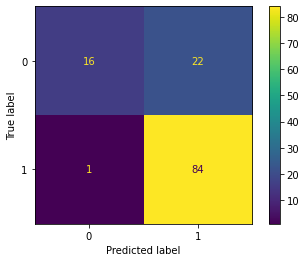

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model_rf, X_test_prepared, y_test);

## Comment:
- From the above model performance metrics, we can see that `RandomForestClassifier` performances pretty well.
- It has the a AUC-PR score 0.86 and AUC-ROC with 0.77. Also it has an accuracy with 0.81, sensitivity is 0.99 and specificity is about 0.42.

##### Discussion:
There are only 491 instances in the train set and 123 instances in the test set. Notice that some attributes have missing values. We will need to take care of it by using SimpleImputer. Some attributes are numerical, while the others are object, meaning that we need to encode these nun-numerical columns by using OneHotEncoder for nominal columns and 
OrdinalEncoder for ordinal columns. 

Things that worked out well was exploring the training set - looking at the distribution of individual features on the histograms:
- There is a positive correlation between `ApplicantIncome` and `LoanAmount`, which is 0.56.

I also noticed that the Loan_Status frequency in both training dataset and test dataset are unbalanced. In this case, I used a balanced accuracy score instead of accuracy to evaluate the model performance. After training several models, I found that RandomForestClassifier had the highest AUC-ROC score with 0.78 in the validation dataset after tunning, the final test AUC-ROC score is 0.77.

However, the difficulties experienced were due to the small sample size:
- features engineering did not help much of the model performance
- the model tunning did not significantly increase the performance 

Things did not work out:
- how to further improve the model performance

For the future directions, we should try to get a bigger dataset in order to get a better model performence.